### Practical 1 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score , confusion_matrix

In [2]:
data = pd.read_csv ("iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = data.iloc [:, : -1]
y = data['Species']

In [5]:
x_test, x_train , y_test, y_train = train_test_split (x, y , test_size = 0.2 , random_state = 42)

In [6]:
scale = StandardScaler()

In [8]:
x_train_s = scale.fit_transform(x_train)
x_test_s = scale.transform(x_test)


In [9]:
lda = LinearDiscriminantAnalysis()

In [12]:
x_train_l = lda.fit_transform(x_train_s , y_train)
x_test_l = lda.transform(x_test_s)

In [13]:
classify = LogisticRegression()

In [14]:
classify.fit(x_train_l , y_train)
y_pred = classify.predict(x_test_l)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

print("Accuracy :", accuracy)
print ("Confusion Matrix : \n", conf_m)

Accuracy : 1.0
Confusion Matrix : 
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]


## Practical 2

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [7]:
data.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [8]:
data.mode().iloc[0]

Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age                         22.000
Outcome                      0.000
Name: 0, dtype: float64

In [14]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [15]:
x_test, x_train , y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [16]:
linear_r = LinearRegression()
linear_r.fit(x_train, y_train)
y_pred_lin = linear_r.predict(x_test)

In [17]:
r2_score = r2_score(y_test, y_pred_lin)
print(r2_score)

0.15432083745026837


In [18]:
log_r = LogisticRegression()
log_r.fit(x_train , y_train)
y_pred_log = log_r.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy :", accuracy)

Accuracy : 0.749185667752443


## Practical 3

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score , recall_score

In [26]:
data3 = pd.read_csv("Social_Network_Ads.csv")
data3.head()
    

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
x = data3.iloc[:, [2,3]]
y = data3["Purchased"]

In [41]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state =42)

In [45]:
std_scale = StandardScaler()
x_train_s = std_scale.fit_transform(x_train)
x_test_s = std_scale.transform(x_test)

In [46]:
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train_s , y_train)



KNeighborsClassifier()

In [47]:
y_pred = knn.predict(x_test_s)

In [49]:
conf_m  = confusion_matrix(y_test, y_pred)
print("Conf matrix: \n", conf_m)


Conf matrix: 
 [[48  4]
 [ 3 25]]


In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9125


In [51]:
error_rate = 1 - accuracy
print(error_rate)

0.08750000000000002


In [56]:
precision = precision_score(y_test, y_pred)
recall = recall_score( y_test, y_pred)

In [57]:
print("Precision score :", precision)
print("recall score :", recall)

Precision score : 0.8620689655172413
recall score : 0.8928571428571429


## Practical 4

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [59]:
data4 = pd.read_csv("iris.csv")
data4.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
x = data.iloc [:, [1,2,3,4]]

In [65]:
inertia = []
for i in range (1,11):
    kmeans  = KMeans(n_clusters = i , max_iter = 300 , random_state = 42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

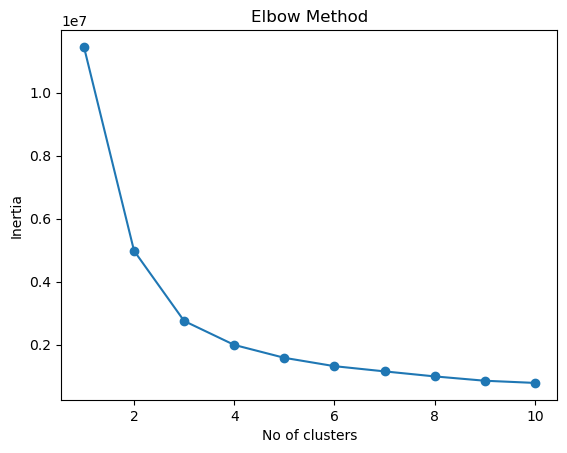

In [66]:
plt.plot(range (1,11), inertia, marker = 'o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

## Practical 5

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [17]:
data5 = pd.read_csv("car_evaluation.csv")
data5.head()

,Buying price,Maintance cost,No of doors,No of persons,lug_boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
col_names = ['Buying price', 'Maintance cost', 'No of doors', 'No of persons', 'lug_boot', 'safety', 'Decision' ]
data5.columns = col_names

data5.head()

,Buying price,Maintance cost,No of doors,No of persons,lug_boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [20]:
le = LabelEncoder()

for col in data5.columns:
    if data5[col].dtype != 'object':
        continue

    data5[col] = le.fit_transform(data5[col])
    
data5.head()

,Buying price,Maintance cost,No of doors,No of persons,lug_boot,safety,Decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [23]:
x = data5.drop(['Decision'], axis = 1)
y = data5['Decision']

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3 , random_state = 42)
x_train.shape, x_test.shape

((1209, 6), (519, 6))

In [24]:
rfc = RandomForestClassifier(n_estimators = 18+25)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=43)

In [26]:
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print('Accuracy:',accuracy*100,'%','\n')
print('Confusion Matrix:\n',conf_matrix)

Accuracy: 96.91714836223507 % 

Confusion Matrix:
 [[108   7   2   1]
 [  0  18   0   1]
 [  2   0 356   0]
 [  3   0   0  21]]


## Practical 6 

In [15]:
maze = np.array([
    [0,0,0,0,0],
    [0,1,0,1,0],
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,0,0,0,2]
])

learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 1000

num_states, num_actions = maze.size, 4
Q = np.zeros((num_states, num_actions))

for _ in range(num_episodes):
    state = 0
    
    while True:
        action = np.random.choice(num_actions) if np.random.uniform(0,1) < epsilon else np.argmax(Q[state, :]) 
        new_state = state + [0,1,2,3][action]
        reward = [-1 ,1,0][maze.flat[new_state]]
        if reward: break
        state = new_state
        
current_state = 0
while current_state != 16:
    action = np.argmax(Q[current_state, :])
    current_state = current_state + (action + 1)
    print("Agent moved to state :", current_state)

Agent moved to state : 1
Agent moved to state : 2
Agent moved to state : 3
Agent moved to state : 4
Agent moved to state : 5
Agent moved to state : 6
Agent moved to state : 7
Agent moved to state : 8
Agent moved to state : 9
Agent moved to state : 10
Agent moved to state : 11
Agent moved to state : 12
Agent moved to state : 13
Agent moved to state : 14
Agent moved to state : 15
Agent moved to state : 16
